In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment.

In [46]:
data=pd.read_csv('Wine.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
data.shape

(178, 13)

In [6]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


# Pre processing

In [8]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

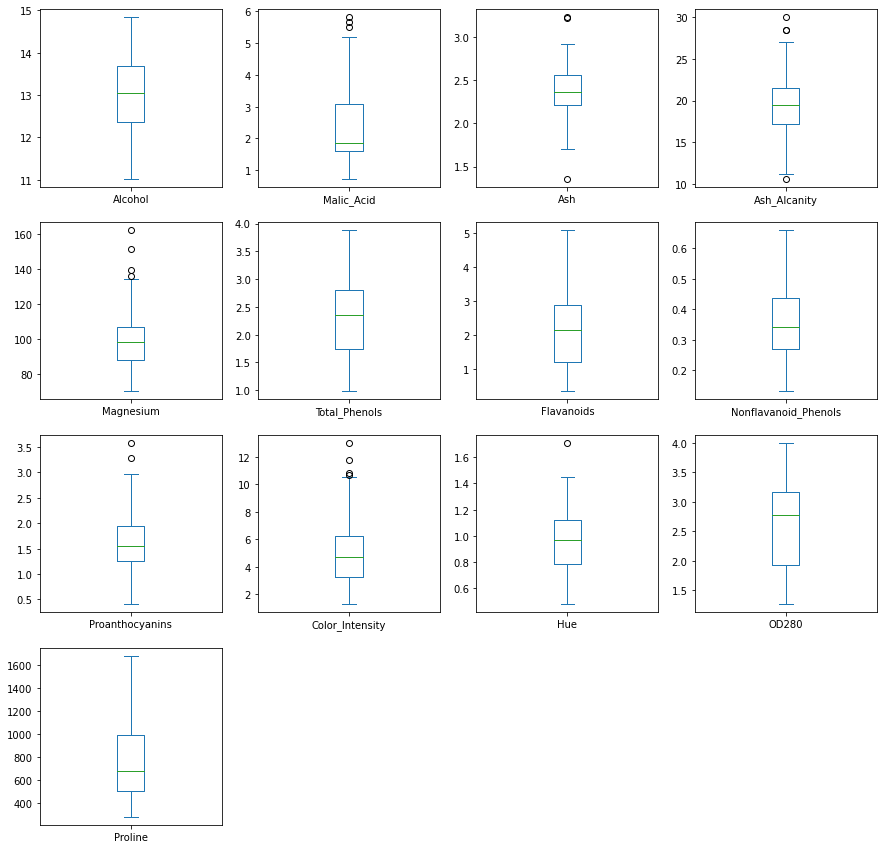

In [47]:
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.show()

In [18]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [51]:
Q1=np.percentile(data['Color_Intensity'],25,interpolation='midpoint')
Q2=np.percentile(data['Color_Intensity'],50,interpolation='midpoint')
Q3=np.percentile(data['Color_Intensity'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in data['Color_Intensity']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['Color_Intensity']>uplim
data.loc[ind1].index

Int64Index([151, 158, 159, 166], dtype='int64')

In [52]:
data.drop([ 151, 158, 159, 166],inplace = True)

In [53]:
Q1=np.percentile(data['Malic_Acid'],25,interpolation='midpoint')
Q2=np.percentile(data['Malic_Acid'],50,interpolation='midpoint')
Q3=np.percentile(data['Malic_Acid'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in data['Malic_Acid']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['Malic_Acid']>uplim
data.loc[ind1].index

Int64Index([123, 137, 173], dtype='int64')

In [54]:
data.drop([123, 137, 173],inplace = True)

In [56]:
Q1=np.percentile(data['Ash'],25,interpolation='midpoint')
Q2=np.percentile(data['Ash'],50,interpolation='midpoint')
Q3=np.percentile(data['Ash'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in data['Ash']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['Ash']>uplim
data.loc[ind1].index

Int64Index([25, 121], dtype='int64')

In [57]:
data.drop([25, 121],inplace = True)

In [58]:
Q1=np.percentile(data['Ash_Alcanity'],25,interpolation='midpoint')
Q2=np.percentile(data['Ash_Alcanity'],50,interpolation='midpoint')
Q3=np.percentile(data['Ash_Alcanity'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in data['Ash_Alcanity']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['Ash_Alcanity']>uplim
data.loc[ind1].index

Int64Index([73, 127], dtype='int64')

In [59]:
data.drop([73, 127],inplace = True)

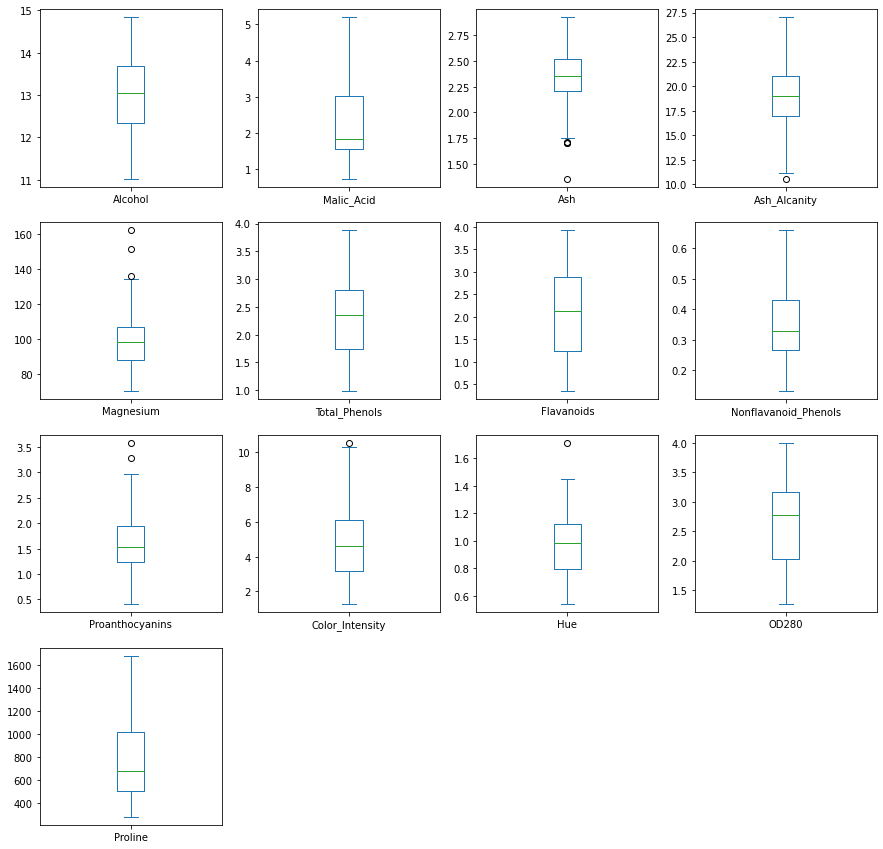

In [60]:
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.show()

In [63]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,13.002216,2.283174,2.345928,19.153293,99.359281,2.291138,2.034551,0.356347,1.579581,4.927425,0.966623,2.627246,755.155689
std,0.814451,1.052481,0.259290,3.064031,14.078190,0.627141,0.977377,0.121954,0.575964,2.129462,0.224510,0.700610,320.326753
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000
25%,12.350000,1.550000,2.205000,17.000000,88.000000,1.745000,1.235000,0.265000,1.245000,3.190000,0.795000,2.030000,506.000000
50%,13.050000,1.830000,2.350000,19.000000,98.000000,2.350000,2.140000,0.330000,1.540000,4.600000,0.980000,2.780000,675.000000
75%,13.685000,3.030000,2.515000,21.000000,107.000000,2.800000,2.890000,0.430000,1.950000,6.115000,1.120000,3.170000,1017.500000
max,14.830000,5.190000,2.920000,27.000000,162.000000,3.880000,3.930000,0.660000,3.580000,10.520000,1.710000,4.000000,1680.000000


In [64]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.899876e-15,1.289720e-16,1.281743e-15,-2.393295e-16,2.684147e-16,-4.424272e-16,-1.316312e-16,3.589943e-17,2.858658e-16,1.063687e-16,4.892959e-16,3.058099e-17,-5.384914e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-2.428810e+00,-1.470634e+00,-3.813845e+00,-2.799912e+00,-2.091716e+00,-2.096948e+00,-1.738988e+00,-1.861591e+00,-2.036758e+00,-1.717990e+00,-1.905954e+00,-1.943061e+00,-1.494070e+00
25%,-8.032123e-01,-6.987095e-01,-5.451493e-01,-7.048784e-01,-8.092975e-01,-8.734569e-01,-8.205181e-01,-7.512850e-01,-5.826532e-01,-8.183526e-01,-7.667314e-01,-8.550293e-01,-7.801566e-01
50%,5.884717e-02,-4.318714e-01,1.575107e-02,-5.018044e-02,-9.684267e-02,9.414046e-02,1.082144e-01,-2.166931e-01,-6.892775e-02,-1.542220e-01,5.976337e-02,2.186866e-01,-2.509836e-01
75%,8.408582e-01,7.117204e-01,6.540171e-01,6.045175e-01,5.443667e-01,8.138409e-01,8.778822e-01,6.057558e-01,6.450636e-01,5.593651e-01,6.852189e-01,7.770188e-01,8.214528e-01
max,2.250941e+00,2.770186e+00,2.220670e+00,2.568611e+00,4.462869e+00,2.541122e+00,1.945155e+00,2.497388e+00,3.483615e+00,2.634184e+00,3.321067e+00,1.965264e+00,2.895874e+00


# 2.Try out different clustering models in the wine dataset.


# PCA Implementation

In [65]:
# doing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(167, 3)

# K-Means Clustering

In [95]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(scaled_data)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 4, 2, 3,
       3, 3, 3, 3, 2, 4, 2, 3, 3, 3, 3, 2, 3, 2, 4, 0, 2, 3, 4, 4, 4, 4,
       4, 4, 4, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 4, 3, 4, 3, 2, 2, 2,
       4, 4, 4, 4, 3, 4, 3, 3, 2, 4, 2, 2, 2, 4, 4, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [96]:
clusters3=KMeans(5,random_state=30).fit(scaled_data)
clusters3

KMeans(n_clusters=5, random_state=30)

In [97]:
clusters3.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 0, 1, 1, 0, 3, 1,
       1, 0, 1, 0, 3, 3, 3, 1, 1, 0, 1, 3, 1, 1, 3, 2, 3, 1, 0, 3, 0, 3,
       0, 0, 0, 1, 1, 4, 3, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 0, 1, 3, 3, 3,
       0, 3, 3, 1, 1, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

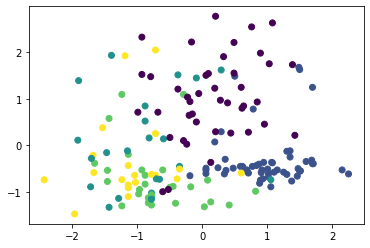

In [105]:
Alcohol=scaled_data['Alcohol']
MalicAcid=scaled_data['Malic_Acid']
plt.scatter(health,inc,c=y_kmeans)

In [98]:
wine4=scaled_data.copy()
wine4['type']=clusters3.labels_
wine4

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,type
0,1.512033,-0.546231,0.325213,-1.163167,1.969276,0.813841,1.052340,-0.627918,1.237154,0.335633,0.327816,1.850735,0.970185,4
1,0.243574,-0.479521,-0.796587,-2.603503,0.045648,0.573941,0.744473,-0.792407,-0.521703,-0.257845,0.372491,1.106292,0.923217,4
2,0.194314,0.073215,1.253600,-0.181120,0.116894,0.813841,1.237060,-0.463428,2.142704,0.354474,0.283140,0.777019,1.345929,4
3,1.684445,-0.317512,0.595993,-0.770348,0.971840,2.493142,1.493616,-0.956897,1.045595,1.353025,-0.476341,1.177873,2.269633,4
4,0.292835,0.292403,2.027256,0.604518,1.328067,0.813841,0.672637,0.276776,0.418676,-0.286106,0.327816,0.433430,-0.063112,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1.425827,0.216164,0.518627,0.277169,-0.595561,-0.977414,-1.369548,0.688001,-0.591360,2.247952,-1.548551,-1.313148,-0.297952,2
163,0.489877,1.550354,0.518627,1.259216,0.188139,-0.785493,-1.318237,0.605756,-0.295315,1.117517,-1.191148,-1.527891,-0.016143,2
164,0.329780,1.902962,-0.332394,0.277169,1.470558,-1.121354,-1.379810,0.605756,-0.399802,2.483460,-1.682577,-1.527891,0.250009,2
165,0.206629,0.292403,0.093117,0.277169,1.470558,-1.025394,-1.390072,1.428205,-0.208243,2.059547,-1.637902,-1.441994,0.265665,2


In [99]:
wine4['type'].value_counts()

4    56
2    42
3    27
1    26
0    16
Name: type, dtype: int64

# Hierarchical Clustering

In [100]:
from sklearn.cluster import AgglomerativeClustering
hclusters=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=6)

In [101]:
y=pd.DataFrame(hclusters.fit_predict(scaled_data),columns=['type'])
y['type'].value_counts()

1    60
0    36
2    26
4    21
5    21
3     3
Name: type, dtype: int64

In [102]:
wine3=scaled_data.copy()
wine3['type']=hclusters.labels_
wine3

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,type
0,1.512033,-0.546231,0.325213,-1.163167,1.969276,0.813841,1.052340,-0.627918,1.237154,0.335633,0.327816,1.850735,0.970185,1
1,0.243574,-0.479521,-0.796587,-2.603503,0.045648,0.573941,0.744473,-0.792407,-0.521703,-0.257845,0.372491,1.106292,0.923217,1
2,0.194314,0.073215,1.253600,-0.181120,0.116894,0.813841,1.237060,-0.463428,2.142704,0.354474,0.283140,0.777019,1.345929,1
3,1.684445,-0.317512,0.595993,-0.770348,0.971840,2.493142,1.493616,-0.956897,1.045595,1.353025,-0.476341,1.177873,2.269633,1
4,0.292835,0.292403,2.027256,0.604518,1.328067,0.813841,0.672637,0.276776,0.418676,-0.286106,0.327816,0.433430,-0.063112,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1.425827,0.216164,0.518627,0.277169,-0.595561,-0.977414,-1.369548,0.688001,-0.591360,2.247952,-1.548551,-1.313148,-0.297952,5
163,0.489877,1.550354,0.518627,1.259216,0.188139,-0.785493,-1.318237,0.605756,-0.295315,1.117517,-1.191148,-1.527891,-0.016143,5
164,0.329780,1.902962,-0.332394,0.277169,1.470558,-1.121354,-1.379810,0.605756,-0.399802,2.483460,-1.682577,-1.527891,0.250009,5
165,0.206629,0.292403,0.093117,0.277169,1.470558,-1.025394,-1.390072,1.428205,-0.208243,2.059547,-1.637902,-1.441994,0.265665,5


# Find the optimum number of clusters in each model and create the model with the optimum number of clusters

# K-Means Clustering - Elbow method

In [68]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,6):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

C:\Users\SEETHU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


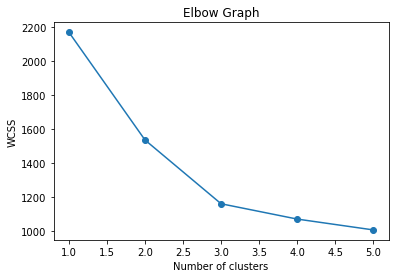

In [71]:
plt.plot(range(1,6),wcss,'-o')
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(scaled_data)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [80]:
clusters3=KMeans(3,random_state=30).fit(scaled_data)
clusters3

KMeans(n_clusters=3, random_state=30)

In [81]:
clusters3.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [87]:
wine4=scaled_data.copy()
wine4['type']=clusters3.labels_
wine4

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,type
0,1.512033,-0.546231,0.325213,-1.163167,1.969276,0.813841,1.052340,-0.627918,1.237154,0.335633,0.327816,1.850735,0.970185,0
1,0.243574,-0.479521,-0.796587,-2.603503,0.045648,0.573941,0.744473,-0.792407,-0.521703,-0.257845,0.372491,1.106292,0.923217,0
2,0.194314,0.073215,1.253600,-0.181120,0.116894,0.813841,1.237060,-0.463428,2.142704,0.354474,0.283140,0.777019,1.345929,0
3,1.684445,-0.317512,0.595993,-0.770348,0.971840,2.493142,1.493616,-0.956897,1.045595,1.353025,-0.476341,1.177873,2.269633,0
4,0.292835,0.292403,2.027256,0.604518,1.328067,0.813841,0.672637,0.276776,0.418676,-0.286106,0.327816,0.433430,-0.063112,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1.425827,0.216164,0.518627,0.277169,-0.595561,-0.977414,-1.369548,0.688001,-0.591360,2.247952,-1.548551,-1.313148,-0.297952,1
163,0.489877,1.550354,0.518627,1.259216,0.188139,-0.785493,-1.318237,0.605756,-0.295315,1.117517,-1.191148,-1.527891,-0.016143,1
164,0.329780,1.902962,-0.332394,0.277169,1.470558,-1.121354,-1.379810,0.605756,-0.399802,2.483460,-1.682577,-1.527891,0.250009,1
165,0.206629,0.292403,0.093117,0.277169,1.470558,-1.025394,-1.390072,1.428205,-0.208243,2.059547,-1.637902,-1.441994,0.265665,1


In [88]:
wine4['type'].value_counts()

2    63
0    59
1    45
Name: type, dtype: int64

# Hierarchical Clustering - using dendrogram

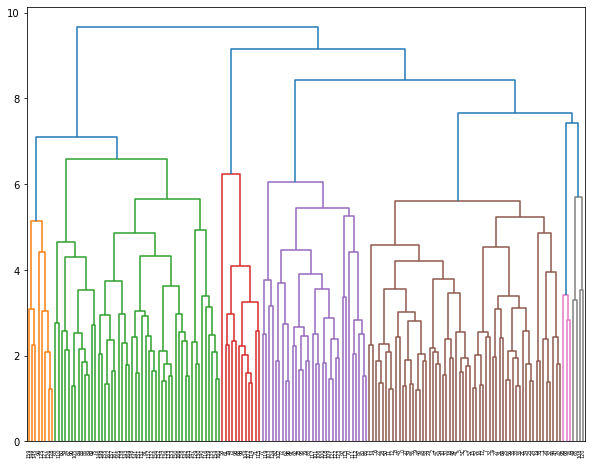

In [89]:
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(scaled_data,'complete'))

In [90]:
from sklearn.cluster import AgglomerativeClustering
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=3)

In [92]:
y=pd.DataFrame(hclusters.fit_predict(scaled_data),columns=['type'])
y['type'].value_counts()

0    63
1    57
2    47
Name: type, dtype: int64

In [94]:
wine3=scaled_data.copy()
wine3['type']=hclusters.labels_
wine3

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,type
0,1.512033,-0.546231,0.325213,-1.163167,1.969276,0.813841,1.052340,-0.627918,1.237154,0.335633,0.327816,1.850735,0.970185,0
1,0.243574,-0.479521,-0.796587,-2.603503,0.045648,0.573941,0.744473,-0.792407,-0.521703,-0.257845,0.372491,1.106292,0.923217,0
2,0.194314,0.073215,1.253600,-0.181120,0.116894,0.813841,1.237060,-0.463428,2.142704,0.354474,0.283140,0.777019,1.345929,0
3,1.684445,-0.317512,0.595993,-0.770348,0.971840,2.493142,1.493616,-0.956897,1.045595,1.353025,-0.476341,1.177873,2.269633,0
4,0.292835,0.292403,2.027256,0.604518,1.328067,0.813841,0.672637,0.276776,0.418676,-0.286106,0.327816,0.433430,-0.063112,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1.425827,0.216164,0.518627,0.277169,-0.595561,-0.977414,-1.369548,0.688001,-0.591360,2.247952,-1.548551,-1.313148,-0.297952,2
163,0.489877,1.550354,0.518627,1.259216,0.188139,-0.785493,-1.318237,0.605756,-0.295315,1.117517,-1.191148,-1.527891,-0.016143,2
164,0.329780,1.902962,-0.332394,0.277169,1.470558,-1.121354,-1.379810,0.605756,-0.399802,2.483460,-1.682577,-1.527891,0.250009,2
165,0.206629,0.292403,0.093117,0.277169,1.470558,-1.025394,-1.390072,1.428205,-0.208243,2.059547,-1.637902,-1.441994,0.265665,2
